In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
values=np.random.randn(365)
values

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [3]:
dates=pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
               '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [4]:
df=pd.DataFrame(values, index=dates, columns=['Value'])
df.head()

,Value
2025-01-01,0.496714
2025-01-02,-0.138264
2025-01-03,0.647689
2025-01-04,1.523030
2025-01-05,-0.234153


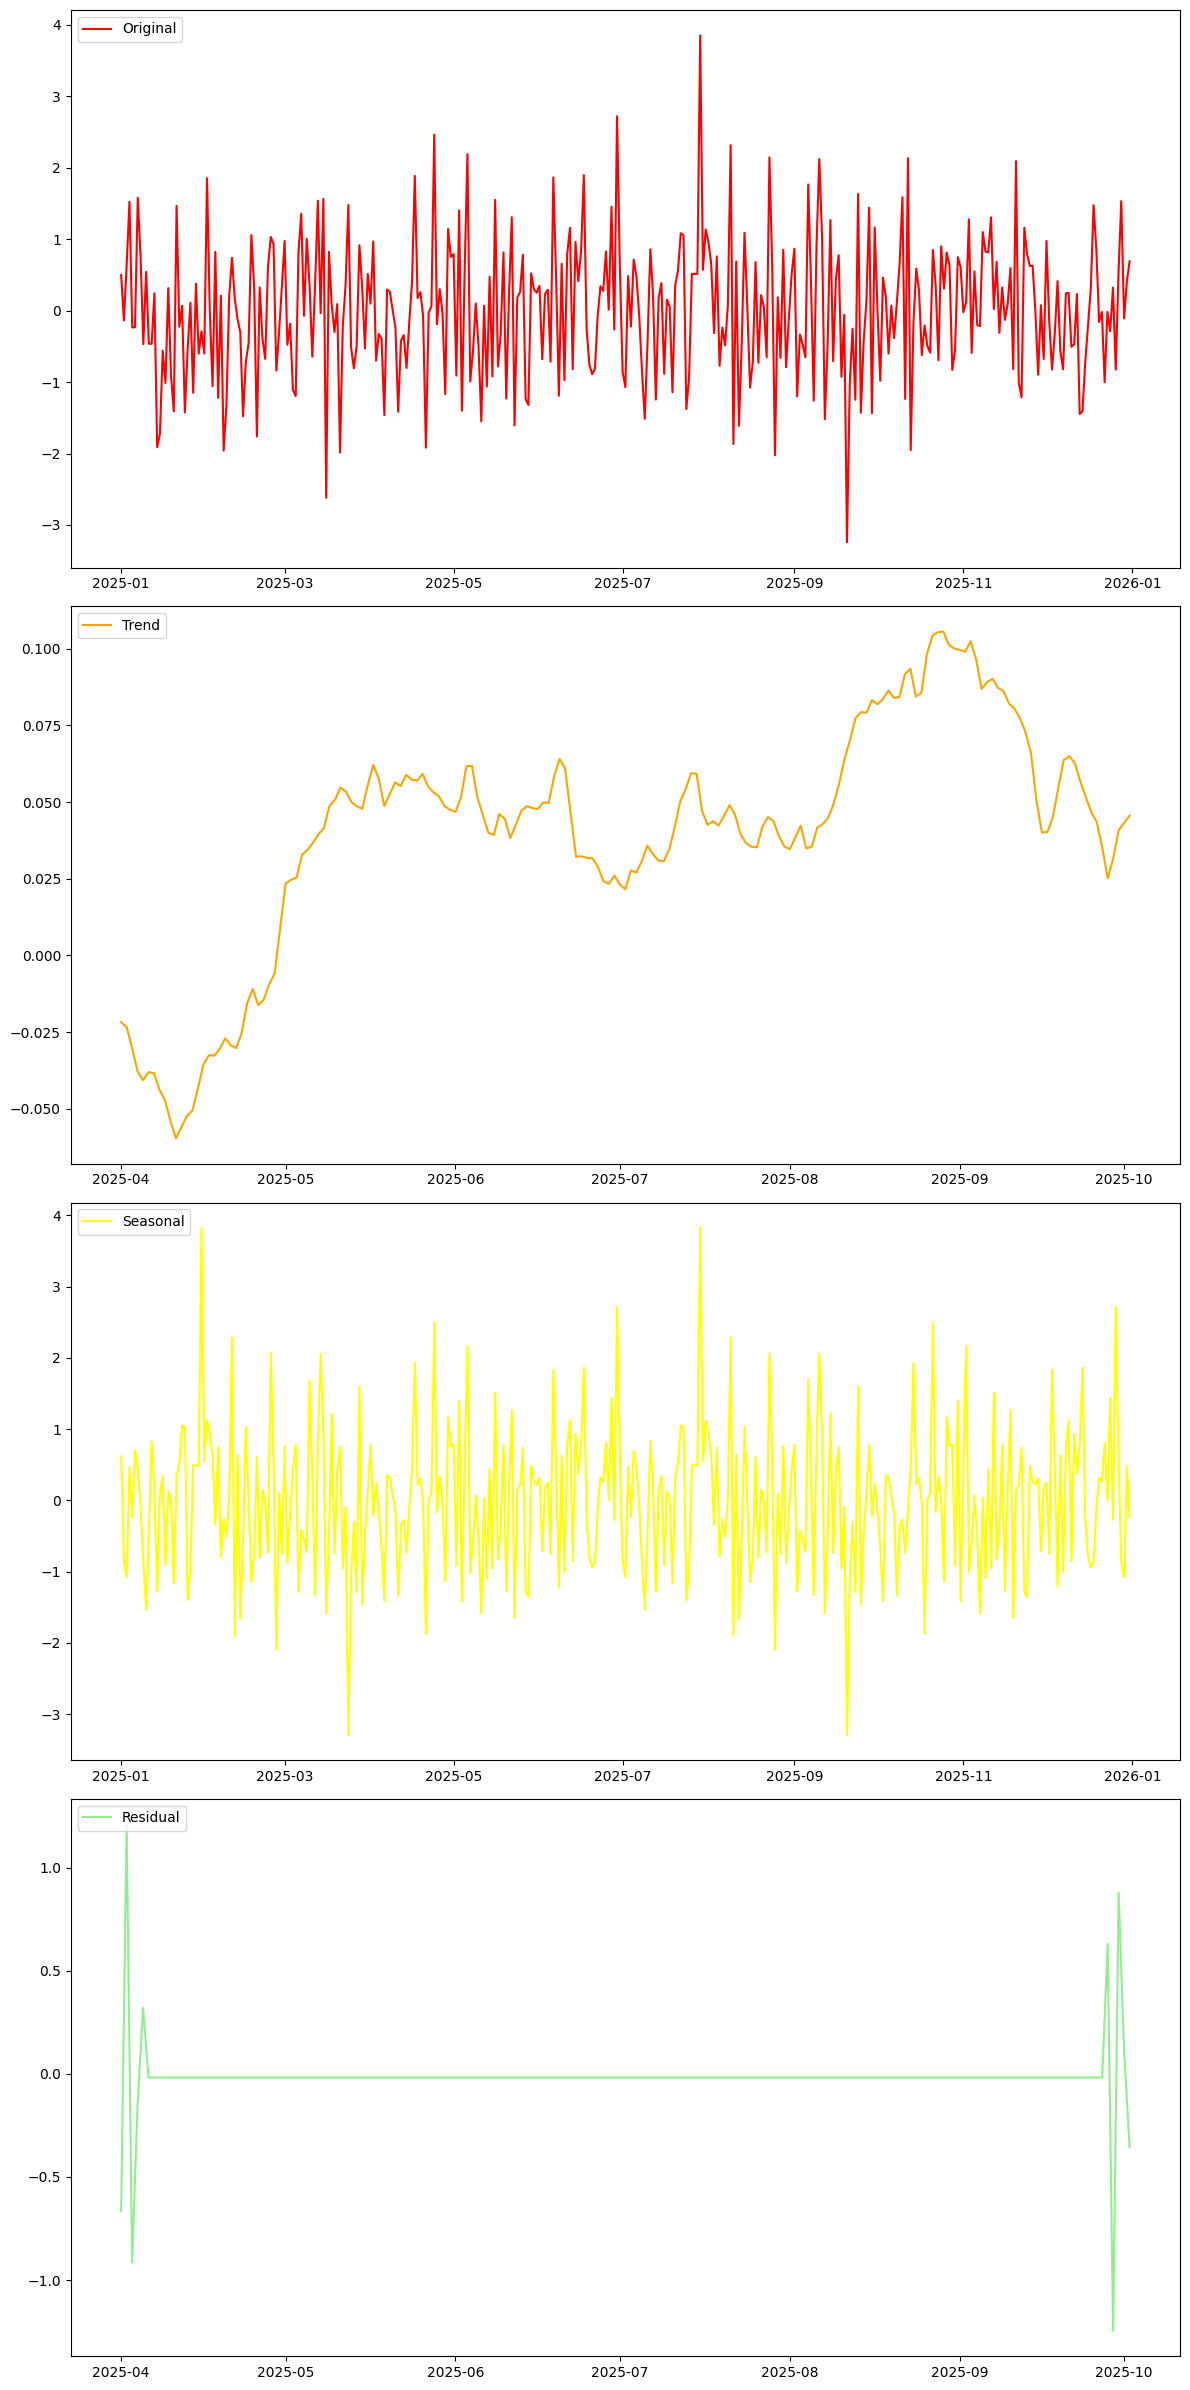

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df['Value'], model='additive', period=180)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(12,24))
plt.subplot(411)
plt.plot(df["Value"], label="Original", color='red')
plt.legend(loc="upper left")
plt.subplot(412)
plt.plot(trend, label="Trend", color='orange')
plt.legend(loc="upper left")
plt.subplot(413)
plt.plot(seasonal, label="Seasonal", color='yellow')
plt.legend(loc="upper left")
plt.subplot(414)
plt.plot(residual, label="Residual", color='lightgreen')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

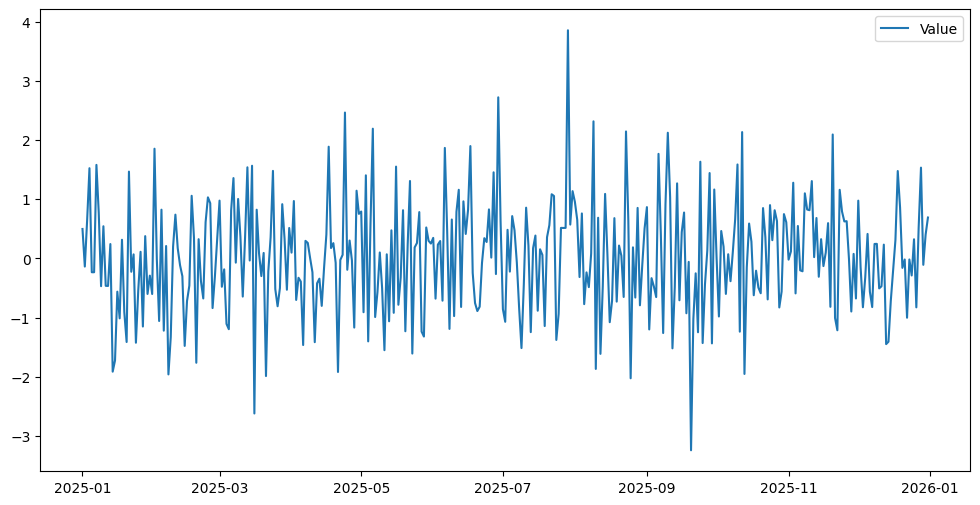

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(df)
plt.show()

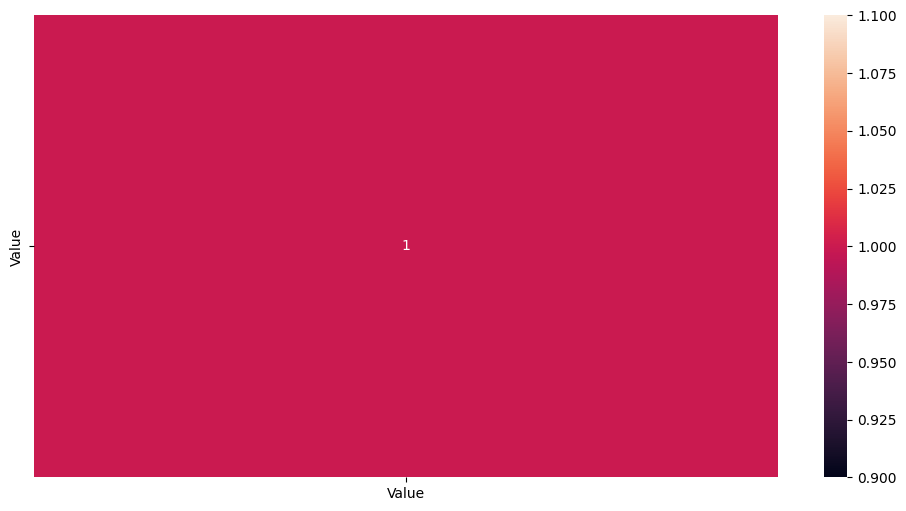

In [9]:
plt.figure(figsize=(12,6))
cor=df.corr()
sns.heatmap(cor, annot=True)
plt.show()

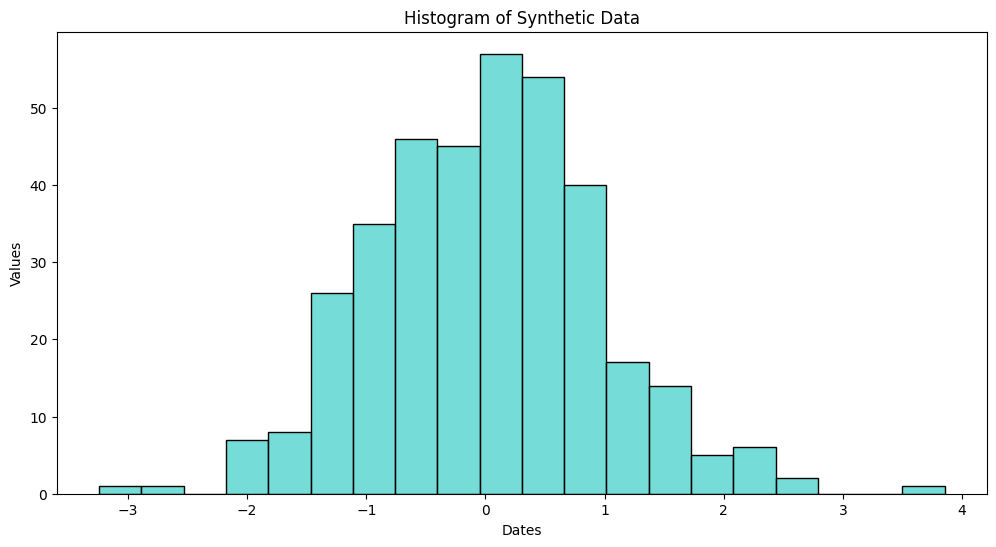

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(df['Value'], color='mediumturquoise')
plt.title("Histogram of Synthetic Data")
plt.xlabel("Dates")
plt.ylabel("Values")
plt.show()

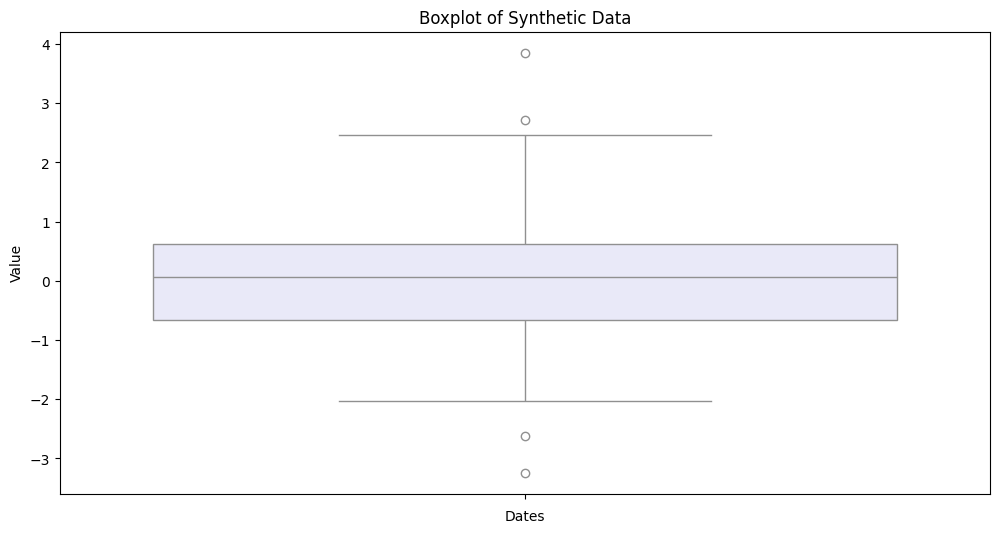

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Value'], color='lavender')
plt.title("Boxplot of Synthetic Data")
plt.xlabel("Dates")
plt.show()

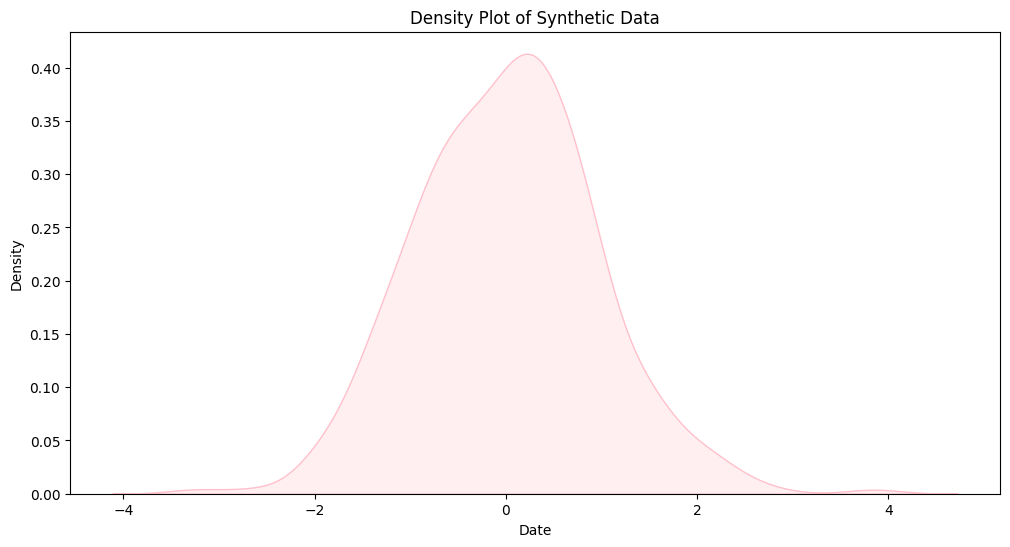

In [12]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["Value"], fill=True, color='pink')
plt.title("Density Plot of Synthetic Data")
plt.xlabel("Date")
plt.show()

In [15]:
from statsmodels.tsa.stattools import kpss, adfuller

def kpss_test(series):
    statistic, p_value, n_lags, critical_value= kpss(series)
    print(f"KPSS Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Number of lags: {n_lags}")
    print("Critical Values: ")
    for key, value in critical_value.items():
        print(f" {key}: {value:.4f}")
    print(f"Result: The series is {'not' if p_value < 0.05 else ''}stationary")

kpss_test(df["Value"])
adfuller(df)

KPSS Statistic: 0.1911
P-value: 0.1000
Number of lags: 0
Critical Values: 
 10%: 0.3470
 5%: 0.4630
 2.5%: 0.5740
 1%: 0.7390
Result: The series is stationary


C:\Users\rohin\AppData\Local\Temp\ipykernel_8788\373417658.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_value= kpss(series)


(-20.237076072819963,
 0.0,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 949.4600864977149)

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def pp_test(series, alpha=0.05):
    try:
        result = adfuller(series, regression='ct', autolag='BIC')
    except Exception as e:
        return {"error": f"An error occurred: {e}"}

    statistic = result[0]
    pvalue = result[1]
    critical_values = result[4]

    if pvalue < alpha:
        conclusion = "The series is likely stationary."
    else:
        conclusion = "The series is likely non-stationary."

    return {
        'statistic': statistic,
        'pvalue': pvalue,
        'critical values': critical_values,
        'conclusion': conclusion
    }

pp_test(df['Value'])

{'statistic': -20.300847400923764,
 'pvalue': 0.0,
 'critical values': {'1%': -3.983858492918219,
  '5%': -3.422620677558916,
  '10%': -3.13418338427965},
 'conclusion': 'The series is likely stationary.'}

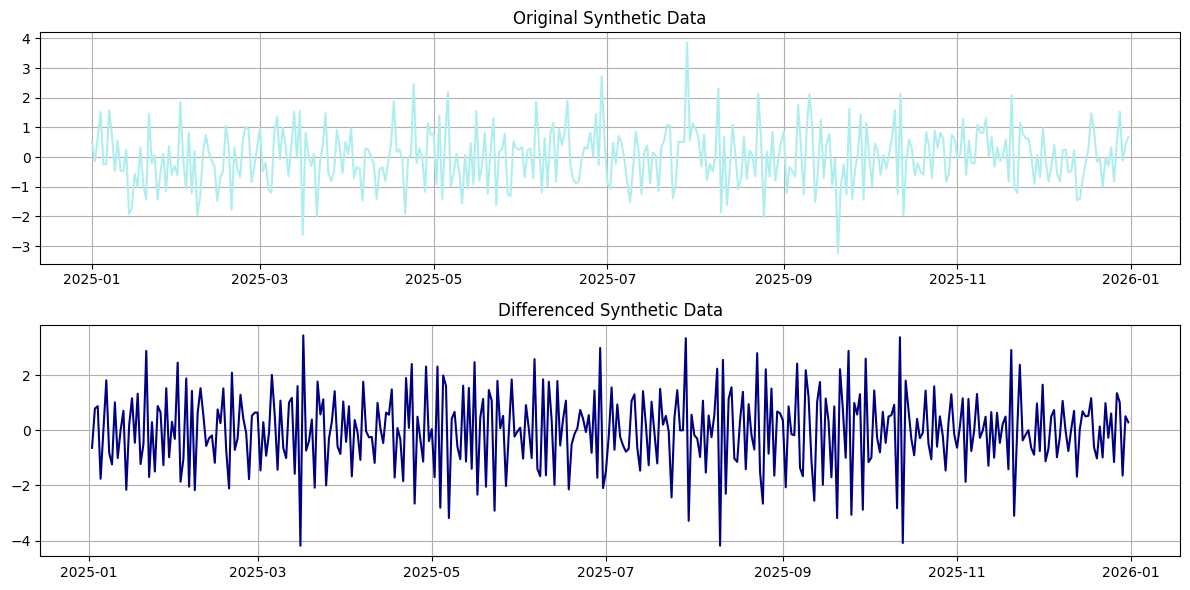

In [13]:
series=df
differenced_series=series.diff(periods=1)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(series, label='Original Series', color='paleturquoise')
plt.title('Original Synthetic Data')
plt.grid()

plt.subplot(2,1,2)
plt.plot(differenced_series, label='Differenced Series', color='navy')
plt.title("Differenced Synthetic Data")
plt.grid()

plt.tight_layout()
plt.show()

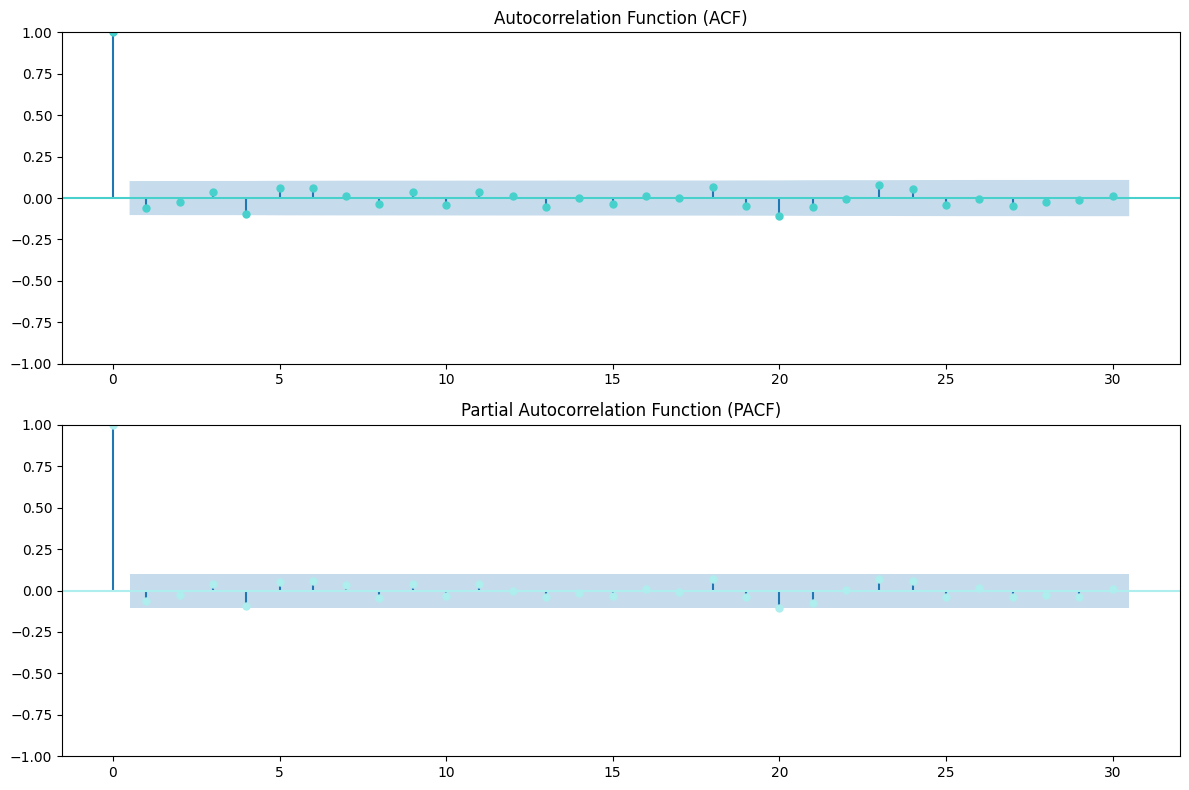

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,axes=plt.subplots(2,1,figsize=(12,8))
plot_acf(df["Value"], lags=30, ax=axes[0], title="Autocorrelation Function (ACF)", color='mediumturquoise')
plot_pacf(df["Value"], lags=30, ax=axes[1], title="Partial Autocorrelation Function (PACF)", color='paleturquoise')
plt.tight_layout()
plt.show()

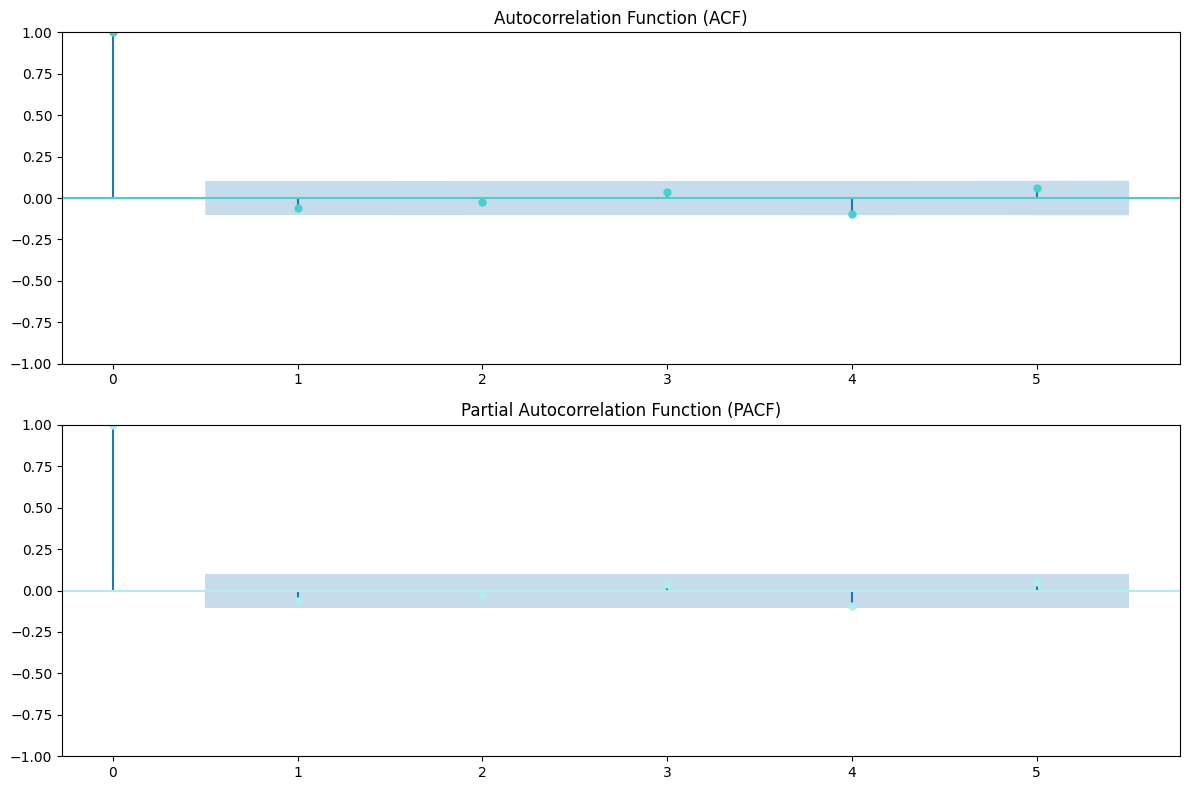

In [15]:
fig,axes=plt.subplots(2,1,figsize=(12,8))
plot_acf(df["Value"], lags=5, ax=axes[0], title="Autocorrelation Function (ACF)", color='mediumturquoise')
plot_pacf(df["Value"], lags=5, ax=axes[1], title="Partial Autocorrelation Function (PACF)", color='paleturquoise')
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
import numpy as np

def exponential_smoothing(df, column, alpha):
    series = df[column]
    result = [series.iloc[0]]
    for n in range(1, len(series)):
        result.append(alpha * series.iloc[n] + (1 - alpha) * result[n - 1])
    return pd.Series(result, index=series.index, name=f'{column}_exp_smooth_{alpha}')

def moving_average(df, column, window):
    return df[column].rolling(window=window).mean().rename(f'{column}_moving_avg_{window}')

# Exponential smoothing
alpha = 0.3
smoothed_series = exponential_smoothing(df, 'Value', alpha)
df = pd.concat([df, smoothed_series], axis=1) # add smooth column to dataframe
print("DataFrame with Exponential Smoothing:\n", df.head())

# Moving average
window = 3
moving_avg_series = moving_average(df, 'Value', window)
df = pd.concat([df, moving_avg_series], axis=1) # add moving average column to dataframe
print("\nDataFrame with Moving Average:\n", df.head())

DataFrame with Exponential Smoothing:
                Value  Value_exp_smooth_0.3  Value_moving_avg_3  \
2025-01-01  0.496714              0.496714                 NaN   
2025-01-02 -0.138264              0.306221                 NaN   
2025-01-03  0.647689              0.408661            0.335379   
2025-01-04  1.523030              0.742972            0.677485   
2025-01-05 -0.234153              0.449834            0.645522   

            Value_exp_smooth_0.3  
2025-01-01              0.496714  
2025-01-02              0.306221  
2025-01-03              0.408661  
2025-01-04              0.742972  
2025-01-05              0.449834  

DataFrame with Moving Average:
                Value  Value_exp_smooth_0.3  Value_moving_avg_3  \
2025-01-01  0.496714              0.496714                 NaN   
2025-01-02 -0.138264              0.306221                 NaN   
2025-01-03  0.647689              0.408661            0.335379   
2025-01-04  1.523030              0.742972            0.6